<a href="https://colab.research.google.com/github/preetirawat2001/Projects_/blob/main/ml_first_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

Naive Bayes for income prediction

Reading the dataset

In [5]:
data=pd.read_csv('/content/adult.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Dropping the null values and converting object datatypes to int

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=LabelEncoder().fit_transform(data[i])
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
 14  income           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


Separation of input features and target variable

In [11]:
y=data['income']
x=data.drop(['income'],axis=1)
x=StandardScaler().fit_transform(x)

In [12]:
y.isnull().sum()

0

Showing the distribution of income levels

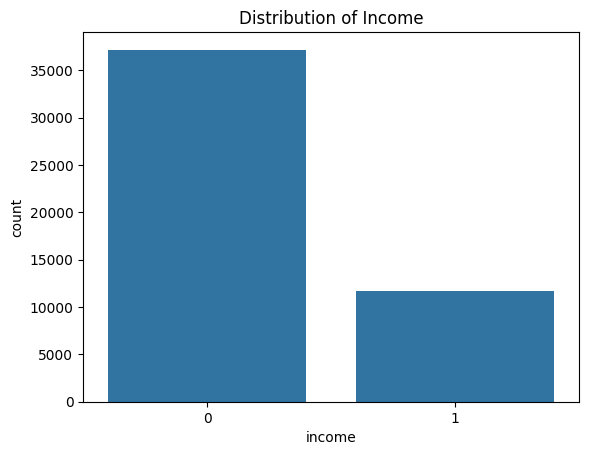

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='income')
plt.title('Distribution of Income')
plt.show()


Visualizing the age distribution of individuals in the dataset.

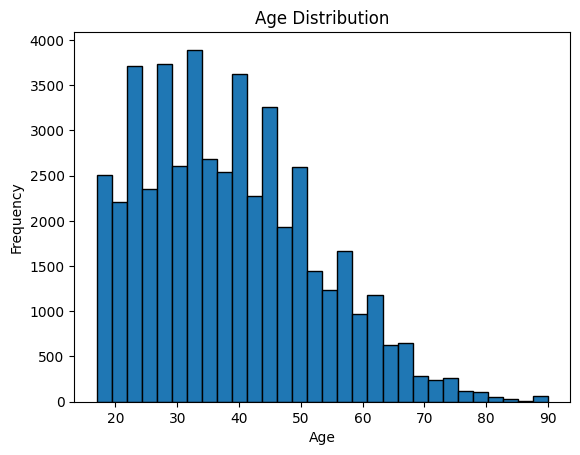

In [25]:
plt.hist(data['age'], bins=30, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


 Compare the income distribution across different education levels

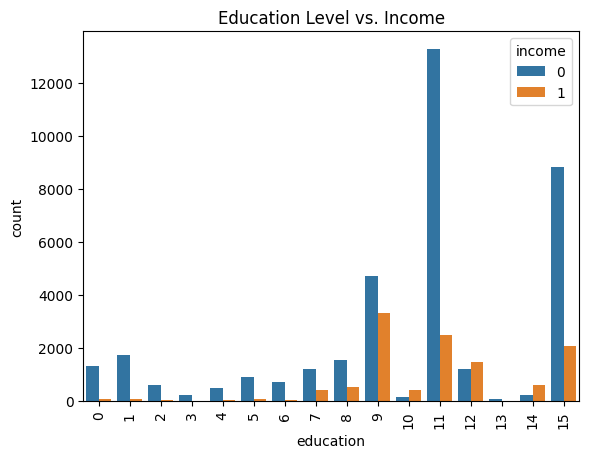

In [26]:
sns.countplot(data=data, x='education', hue='income')
plt.xticks(rotation=90)
plt.title('Education Level vs. Income')
plt.show()

Compare income distribution by gender

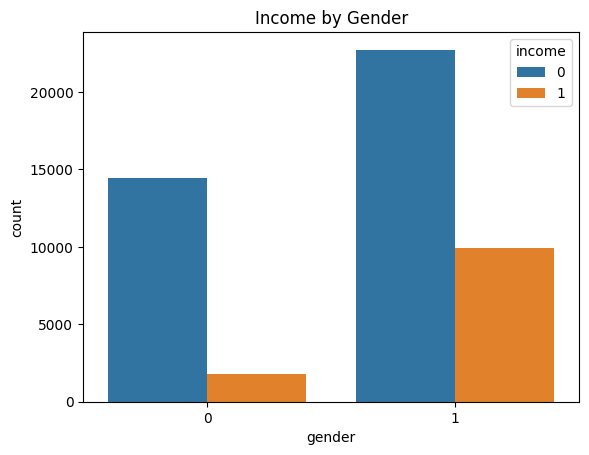

In [27]:
sns.countplot(data=data, x='gender', hue='income')
plt.title('Income by Gender')
plt.show()


Naive bayes on single validation

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model=GaussianNB()
model.fit(x_train,y_train)
print('accuracy',accuracy_score(y_test,model.predict(x_test)))
print('precision',precision_score(y_test,model.predict(x_test),average='micro'))
print('recall',recall_score(y_test,model.predict(x_test),average='micro'))
print('f1',f1_score(y_test,model.predict(x_test),average='micro'))
print('roc auc',roc_auc_score(y_test,model.predict(x_test)))

accuracy 0.8033575596273927
precision 0.8033575596273927
recall 0.8033575596273927
f1 0.8033575596273926
roc auc 0.6476380375270235


Naive bayes on cross validation

In [16]:
model1 = cross_validate(GaussianNB(),
                                x,
                                y,
                                scoring = ['accuracy','precision','recall','f1','roc_auc'],
                                cv = 20)

In [17]:
results=pd.DataFrame(model1)
results

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.037404,0.052314,0.806386,0.686667,0.352137,0.465537,0.854769
1,0.065210,0.044941,0.800246,0.683019,0.309402,0.425882,0.857290
2,0.033367,0.021181,0.803030,0.684588,0.327055,0.442642,0.859988
3,0.037320,0.021212,0.798116,0.663082,0.316781,0.428737,0.850697
4,0.034770,0.021085,0.800164,0.676471,0.315068,0.429907,0.847218
5,0.037934,0.024478,0.799345,0.658784,0.333904,0.443182,0.853583
6,0.033864,0.020657,0.801802,0.673611,0.332192,0.444954,0.857475
7,0.033708,0.021166,0.802621,0.674658,0.337329,0.449772,0.851042
8,0.034227,0.020828,0.804668,0.686411,0.337329,0.452354,0.849293
9,0.034032,0.035403,0.803440,0.681818,0.333904,0.448276,0.865392


In [18]:
a=results.describe()
a=a.iloc[1,:]
a

fit_time          0.041477
score_time        0.027007
test_accuracy     0.803100
test_precision    0.681703
test_recall       0.331993
test_f1           0.446397
test_roc_auc      0.856045
Name: mean, dtype: float64